In [2]:
import datastore

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spot = datastore.getSpotPrice()

production = datastore.getAllProductionMWh()

cons = datastore.getConsumptionGWh()
productionGwh = datastore.getProductionGWh()
# capacityTo = datastore.getCapacityTo()
transCapTo = datastore.getTransmissionCapTo()

otherData = datastore.getOtherNordPoolData()
hydroReservoirs = datastore.getWeeklyHydroReservs()

temp = datastore.getDailyWeather()

Missing values in Index(['spotPrice'], dtype='object') : 3
Missing values in Index(['water(MWh)', 'wind(MWh)', 'nuc(MWh)', 'solMWh', 'trmMWh', 'OthMWh'], dtype='object') : 346
Missing values in Index(['ConsumptionGWh'], dtype='object') : 12
Missing values in Index(['ProductionGWh'], dtype='object') : 14
Missing values in Index(['TDK1SE3', 'TNO1SE3', 'TSE2SE3', 'TF1SE3', 'TSE4SE3', 'TLSE3SE3'], dtype='object') : 0
Missing values in Index(['ExchangeSweden(GWh)', 'ProductionSweden(GWh)',
       'ConsumptionSweden(GWh)', 'ExchangeSE2>SE3(GWh)',
       'ExchangeSE4>SE3(GWh)', 'ReguSE3(EUR_MWh)', 'TurnoverSE3(MWh)'],
      dtype='object') : 268
Missing values in Index(['HydroRes(GWh_week)', 'HydroResSE3(GWh_week)'], dtype='object') : 480
Missing values in Index(['Temperature(day)', 'Precipitation(day)'], dtype='object') : 432


Text(0, 0.5, 'Production (MWh)')

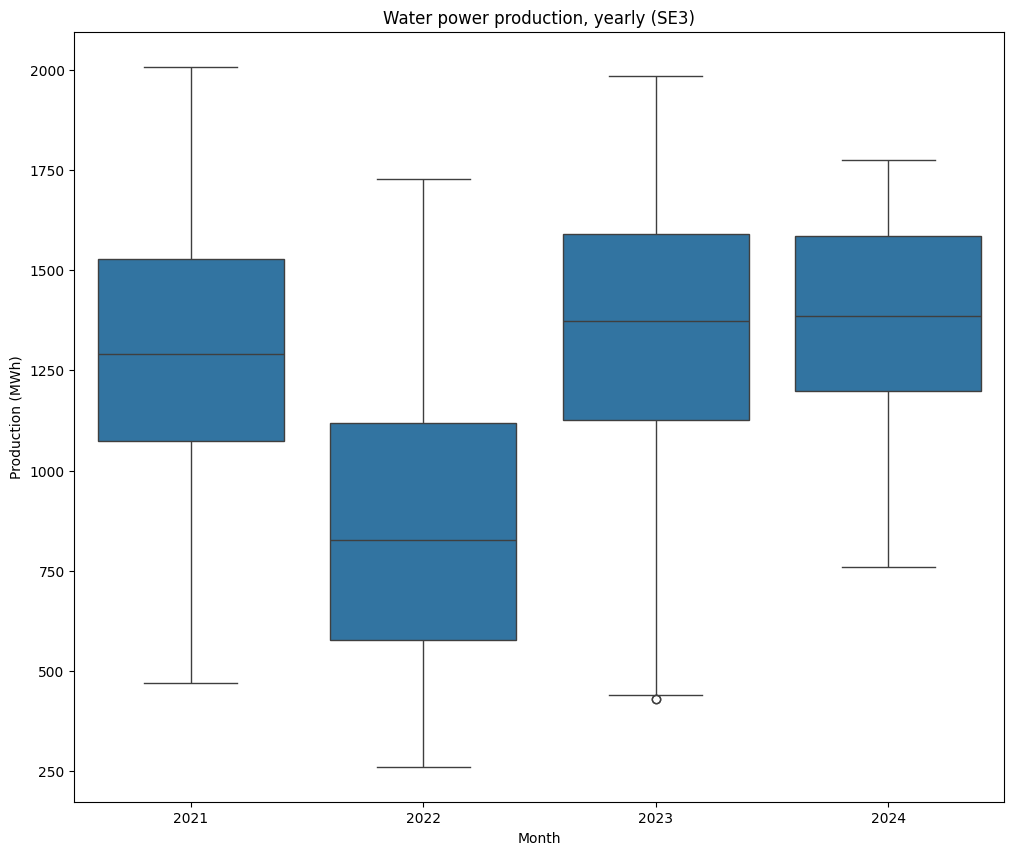

In [27]:
# Figure size and title
fig, ax = plt.subplots(figsize=(12,10))


# sns.boxplot(x=spot.index.year, y='spotPrice', data=spot)
# ax.set_title('Spot price by hour')
# ax.set_xlabel('Hour')
# ax.set_ylabel('Spot price (SEK/MWh)')

# sns.boxplot(x = production.index.hour, y = production['wind(MWh)'],ax = ax)
# ax.set_title('Wind production by hour')
# ax.set_xlabel('Hour')
# ax.set_ylabel('Production (MWh)')

sns.boxplot(x = production.index.year, y = production['trmMWh'],ax = ax)
ax.set_title('Thermal power production, yearly (SE3)')
ax.set_xlabel('Month')
ax.set_ylabel('Production (MWh)')


<Figure size 1000x600 with 0 Axes>

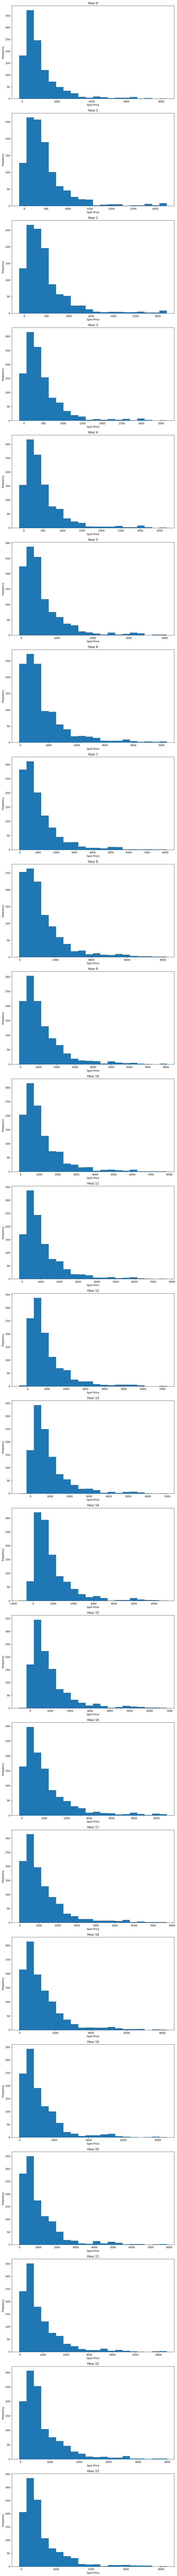

In [13]:
# sns.histplot(data=spot, x = 'spotPrice' , kde=True)

plt.figure(figsize=(10,6))

# Get the unique values in the 'Hour' column
unique_hours = spot['Hour'].unique()

# Create a subplot with n histograms
fig, axes = plt.subplots(nrows=len(unique_hours), figsize=(10, 6 * len(unique_hours)))

# Iterate over the unique hours and plot the histogram for each hour
for i, hour in enumerate(unique_hours):
    # Select the data for the current hour
    data = spot[spot['Hour'] == hour]['spotPrice']
    
    # Plot the histogram
    axes[i].hist(data, bins=20)
    axes[i].set_title(f'Hour {hour}')
    axes[i].set_xlabel('Spot Price')
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<Axes: >

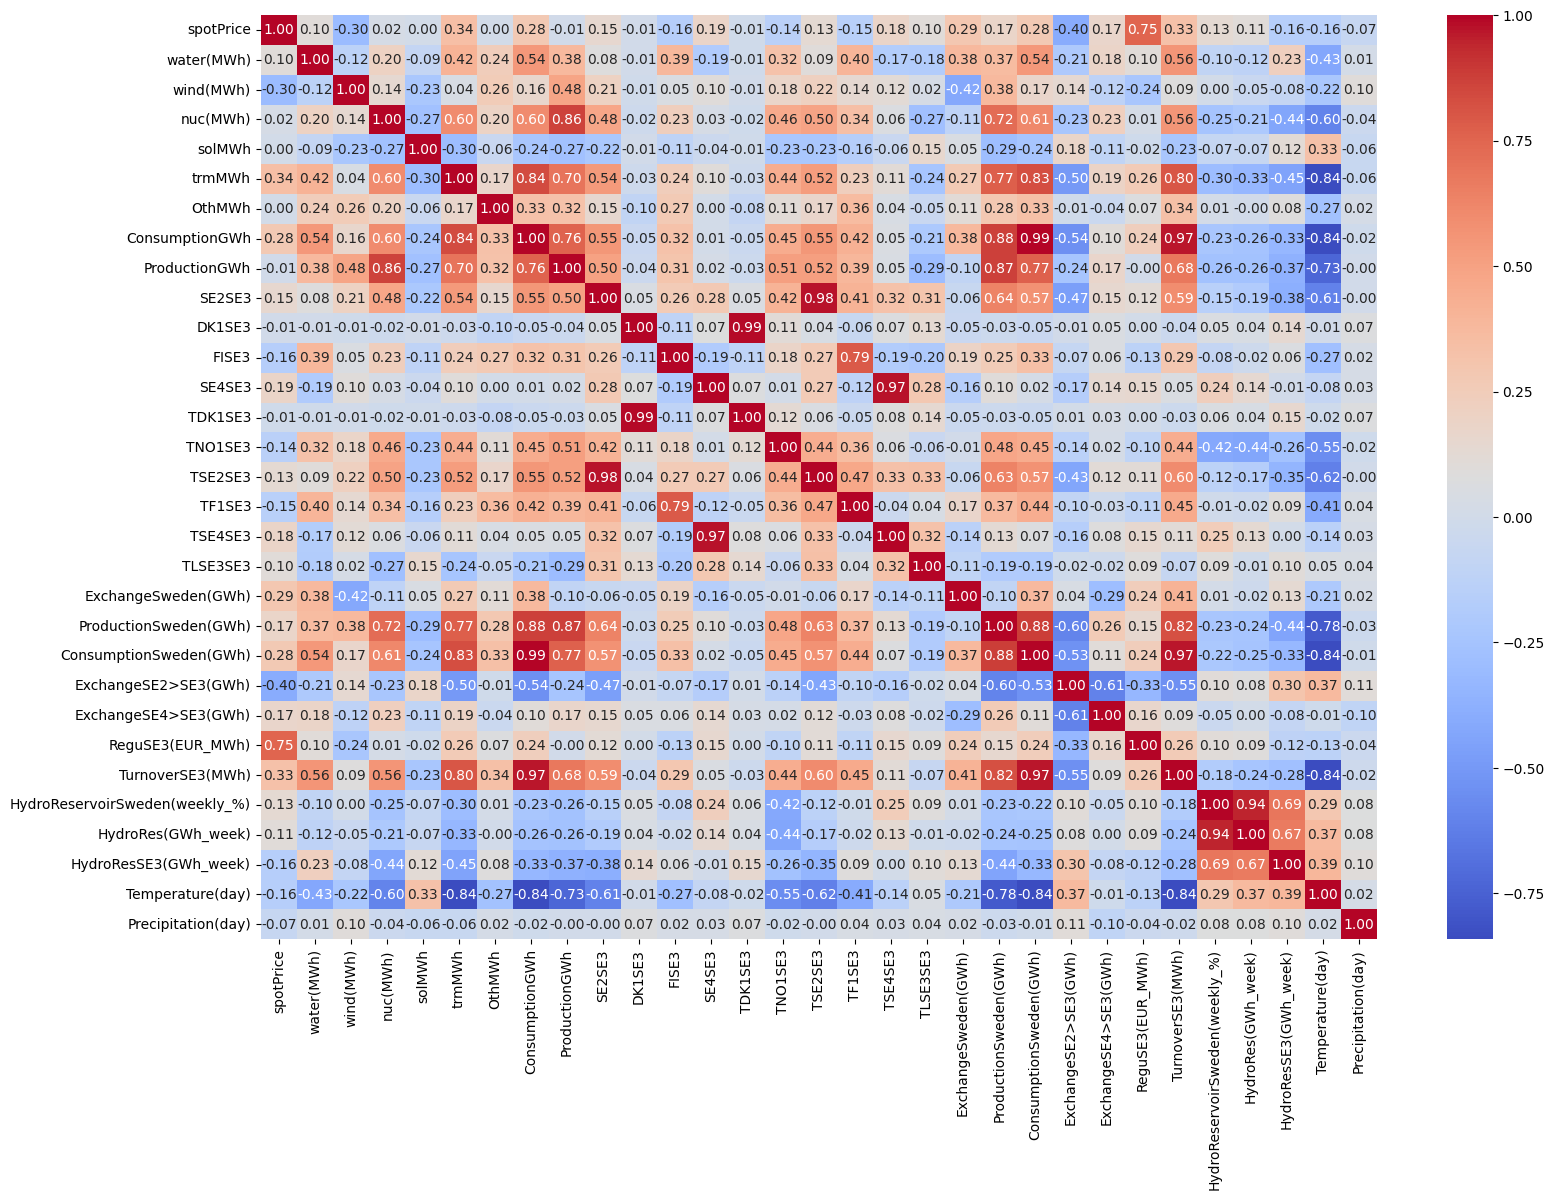

In [13]:
fullData = pd.concat([spot, production, cons, productionGwh, capacityTo, transCapTo, otherData, hydroReservoirs, temp], axis=1)

fig, ax = plt.subplots(figsize=(18,12))

sns.heatmap(fullData.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)